In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

## Statistical Evaluation

In [2]:
iris_corr = iris_df.corr()

In [90]:
for x in list(iris_df.columns):
    iris_corr[x].replace(1, np.nan, inplace=True) 
    rng_lst = []
    rng_lst2=[]
    rng_lst.append(iris_corr[x].max())
    rng_lst.append(iris_corr[x].min())
    rng_lst2.append(abs(rng_lst[0]))
    rng_lst2.append(abs(rng_lst[1]))
    index = rng_lst2.index(max(rng_lst2))
    print(x)
    print("Highest corr:", iris_corr[x].idxmax())
    print("Corr:",rng_lst[index])
    print()


sepal length (cm)
Highest corr: petal length (cm)
Corr: 0.8717537758865838

sepal width (cm)
Highest corr: sepal length (cm)
Corr: -0.42844010433053864

petal length (cm)
Highest corr: petal width (cm)
Corr: 0.962865431402796

petal width (cm)
Highest corr: petal length (cm)
Corr: 0.962865431402796

target
Highest corr: petal width (cm)
Corr: 0.9565473328764024



1) sepal length (cm)
2) sepal width (cm)
3) petal length (cm)
4) petal width (cm)
5) target
1


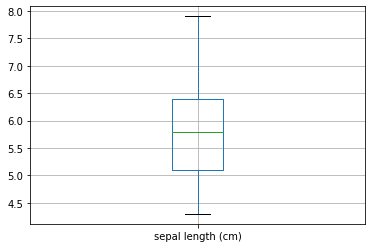

In [99]:
i=1
for z in list(iris_df.columns):
    print(f'{i}) {z}')
    i+=1
choice = int(input())
bplot = iris_df.boxplot(column = iris_df.columns[choice-1])
#bplot.set_ylabel('Flower Type')
#bplot.set_title(f'{choice1} by {choice2}')

In [50]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## KNN Algorithim

In [3]:
#Split data 80-20
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split as SPLIT
X_train, X_test, y_train, y_test = SPLIT(x, y, test_size = 0.20, random_state = 0)

In [103]:
#Scale Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
#Model Development
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 1)
Iris_KNN = KNN.fit(X_train_scaled, y_train)

In [110]:
knn_score = Iris_KNN.score(X_test_scaled, y_test)
print('KNN Score:', knn_score)

KNN Score: 0.9666666666666667


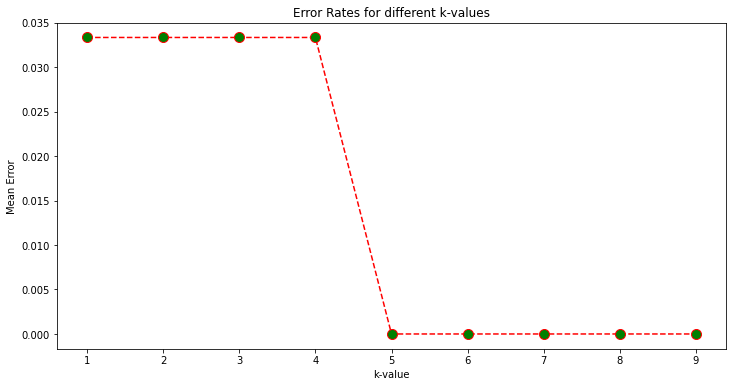

In [115]:
import matplotlib.pyplot as plt#Visualization of errors and optimized K Value
error = []

# calculate the error for k values between 1 and 40
def KnnOptimization(n):
    for i in range(1, n):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train_scaled, y_train)
        pred_y_i = knn.predict(X_test_scaled)
        error.append(np.mean(pred_y_i != y_test))
    
    plt.figure(figsize = (12, 6))
    plt.plot(range(1, n), error, color = 'red', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'green', markersize = 10)

    plt.title('Error Rates for different k-values')
    plt.xlabel('k-value')
    plt.ylabel('Mean Error')
    plt.show()


KnnOptimization(10)


In [118]:
#Ex. Prediction
Iris_KNN.predict([[6,3,2,4]])[0]

2

In [127]:
#UI Prediction
flow = ['setosa', 'versicolor', 'virginica']
ls = []
iris_copy = iris_df.iloc[:,0:-1]
for z in list(iris_copy.columns):
    choice = float(input(f'Enter {z}: '))
    ls.append(choice)
    
pred = Iris_KNN.predict([ls])[0]
print('Flower Type:', flow[pred])

Enter sepal length (cm): 6
Enter sepal width (cm): 3
Enter petal length (cm): 2
Enter petal width (cm): 4
Flower Type: virginica


## Multinomial Logit Regression

In [54]:
X_train, X_test, y_train, y_test = SPLIT(x, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [55]:
#Model Development
from sklearn.linear_model import LogisticRegression
Multi_Logit = LogisticRegression(multi_class='auto', solver = 'newton-cg')

Multi_Logit.fit(X_train_Scaled, y_train)

LogisticRegression(solver='newton-cg')

In [8]:
#Prediction and Evaluation
y_pred = Multi_Logit.predict(X_test_Scaled)
y_pred_train = Multi_Logit.predict(X_train_Scaled)


from sklearn import metrics
print('Testing Score:', metrics.accuracy_score(y_test, y_pred).round(4))
print('Training Score:', metrics.accuracy_score(y_train, y_pred_train).round(4))

Testing Score: 0.9737
Training Score: 0.9732


In [153]:
test_score_log = metrics.accuracy_score(y_test, y_pred).round(4)
train_score_log = metrics.accuracy_score(y_train, y_pred_train).round(4)

log_score = pd.DataFrame()
log_score['Logistic'] = [train_score_log, test_score_log]
log_score.rename(index = {0: "Train", 1:"Test"}, inplace = True)
log_score

,Logistic
Train,0.9732
Test,0.9737


## Simple Logistic Regression

In [9]:
#Parameter Tuning
smp_iris_df = iris_df[iris_df['target'] != 2.0]

x = smp_iris_df[['sepal length (cm)', 'sepal width (cm)', \
                'petal length (cm)', 'petal width (cm)']]
y = smp_iris_df.target


X_train, X_test, y_train, y_test = SPLIT(x, y, test_size = 0.25, random_state = 0)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#Model Development
smp_log = LogisticRegression()
smp_log.fit(X_train_scaled, y_train)

LogisticRegression()

In [251]:
#Prediction & Model Evaluation
y_pred = smp_log.predict(X_test_scaled)
y_pred_train = smp_log.predict(X_train_scaled)

smp_test_score = metrics.accuracy_score(y_test, y_pred)
smp_train_score = metrics.accuracy_score(y_train, y_pred_train)

log_score['SMP_Logistic'] = [smp_train_score, smp_test_score]
log_score

,Logistic,SMP_Logistic
Train,0.9732,1.0
Test,0.9737,1.0


<AxesSubplot:xlabel='sepal length (cm)', ylabel='target'>

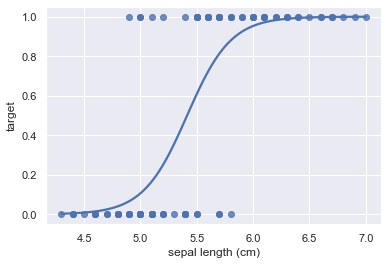

In [252]:
import seaborn as sb
sb.set()

sb.regplot(x=x['sepal length (cm)'], y=y, data=iris, logistic=True, ci=None)

## UI Logistic (Multi)

In [53]:
iris.keys()
#Multi_Logit
iris.feature_names

flowers = ['setosa', 'versicolor', 'virginica']
emoj = ['🌸','🌺', '🥀']

ls=[]
for z in list(iris.feature_names):
    choice = float(input(f'Enter {z}: '))
    ls.append(choice)
print(flowers[Multi_Logit.predict([ls])[0]], emoj[Multi_Logit.predict([ls])[0]])

Enter sepal length (cm): 0.4
Enter sepal width (cm): 0.3
Enter petal length (cm): 0.2
Enter petal width (cm): 0.1
versicolor 🌺


## Decision Tree

In [14]:
x = iris.data
y = iris.target

X_train, X_test, y_train, y_test = SPLIT(x, y, test_size = 0.20, random_state = 2)

In [19]:
#Regularization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#model development
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier() #maxleafs
iris_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [25]:
#Model prediction & Eval
y_pred = iris_tree.predict(X_test_scaled)
y_pred_train = iris_tree.predict(X_train_scaled)


from sklearn.metrics import accuracy_score
print('Testing set score:', accuracy_score(y_test, y_pred).round(4))
print('Training set score:', accuracy_score(y_train, y_pred_train))

Testing set score: 0.9333
Training set score: 1.0


In [ ]:
#OVERFITTING PROBLEM ^^